In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt

In [6]:
p = lambda t, n : np.cos(t/2.0)**n # padrão de potência 
g_kraus = lambda n: 10*np.log10(41253./(hpbw(n)**2.)) # Fórmula de Kraus
g_tp = lambda n: 10*np.log10(22.181/(2*np.radians(hpbw(n))**2.)) # Fórmula de Tai e Pereira
hpbw = lambda n: 4*np.math.degrees(np.math.acos((0.5)**(1./n)))

def plotDiagramaRadiacao(n):
    print 'Ganho - Kraus[{}]: {} [dBi]'.format(n, g_kraus(n))
    print 'Ganho - Tai e Pereira[{}]: {} [dBi]'.format(n, g_tp(n))
    print 'HPBW[{}]: {} [graus]'.format(n, hpbw(n))
    print
    
    ang = np.radians(0.5*hpbw(n))
    theta = np.linspace(-np.pi, np.pi, 1000)
    theta_ticks = np.linspace(-np.pi, np.pi, 7)

    # plot linear
    plt.figure()
    plt.plot(theta, p(theta, n),linewidth=2)
    plt.xticks(theta_ticks, np.degrees(theta_ticks))
    plt.plot(ang*np.array([1, 1]), [0, 1], '--k')
    plt.plot(-ang*np.array([1, 1]), [0, 1], '--k')
    plt.xlabel('$\\theta$ [graus]')
    plt.ylabel('$P(\\theta)$')
    plt.title('$n={}$'.format(n))
    plt.grid()
    plt.savefig('./figuras/radlin_n{}.eps'.format(n), format='eps', dpi=1000)   

    # plot polar
    plt.figure()
    plt.polar(theta, p(theta, n),linewidth=2)
    plt.plot(ang*np.array([1, 1]), [0, 1], '--k')
    plt.plot(-ang*np.array([1, 1]), [0, 1], '--k')
    plt.title('$n={}$'.format(n), loc='left') # parâmetro y afasta o title
    plt.savefig('./figuras/radpol_n{}.eps'.format(n), format='eps', dpi=1000)   

Ganho - Kraus[1]: -1.44966946633 [dBi]
Ganho - Tai e Pereira[1]: -1.99226092443 [dBi]
HPBW[1]: 240.0 [graus]

Ganho - Kraus[2]: 1.04910526584 [dBi]
Ganho - Tai e Pereira[2]: 0.506513807741 [dBi]
HPBW[2]: 180.0 [graus]

Ganho - Kraus[3]: 2.6403049878 [dBi]
Ganho - Tai e Pereira[3]: 2.0977135297 [dBi]
HPBW[3]: 149.869244844 [graus]

Ganho - Kraus[4]: 3.8051256549 [dBi]
Ganho - Tai e Pereira[4]: 3.2625341968 [dBi]
HPBW[4]: 131.060398959 [graus]

Ganho - Kraus[5]: 4.72359610961 [dBi]
Ganho - Tai e Pereira[5]: 4.18100465151 [dBi]
HPBW[5]: 117.909273351 [graus]

Ganho - Kraus[6]: 5.48170545014 [dBi]
Ganho - Tai e Pereira[6]: 4.93911399204 [dBi]
HPBW[6]: 108.054409887 [graus]

Ganho - Kraus[7]: 6.12712543078 [dBi]
Ganho - Tai e Pereira[7]: 5.58453397268 [dBi]
HPBW[7]: 100.316297991 [graus]

Ganho - Kraus[8]: 6.68902351738 [dBi]
Ganho - Tai e Pereira[8]: 6.14643205928 [dBi]
HPBW[8]: 94.0321990128 [graus]

Ganho - Kraus[9]: 7.18654094273 [dBi]
Ganho - Tai e Pereira[9]: 6.64394948463 [dBi]
HPBW[

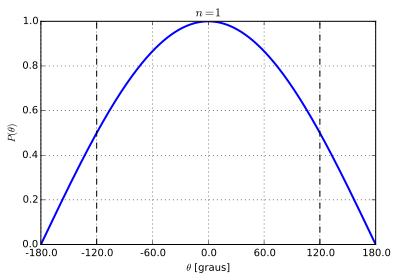

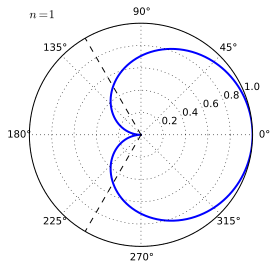

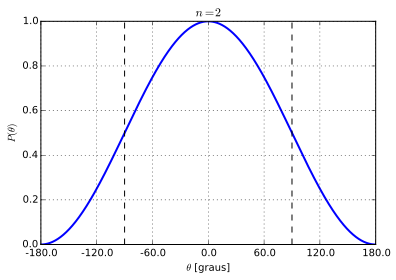

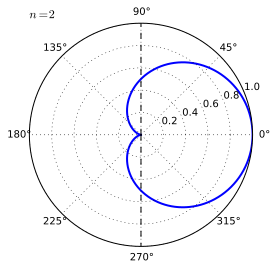

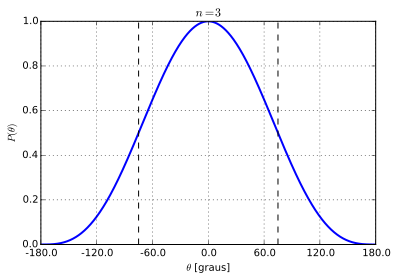

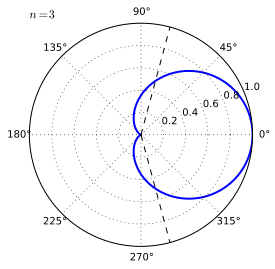

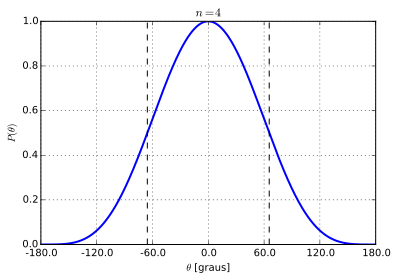

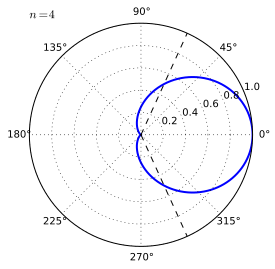

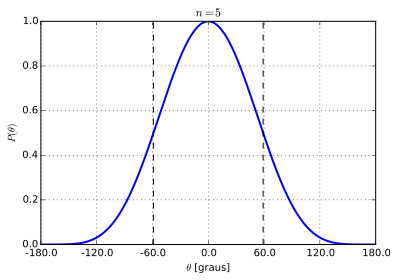

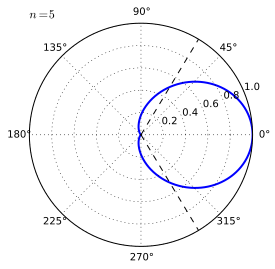

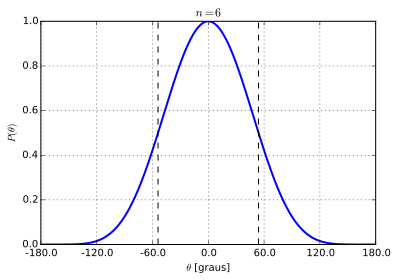

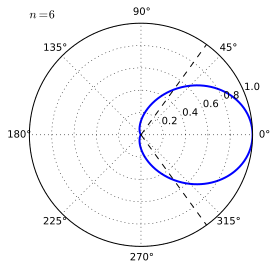

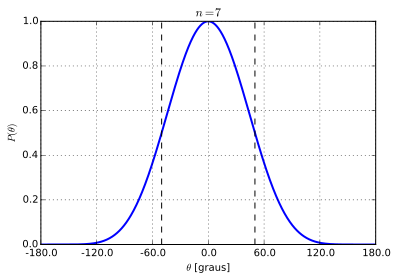

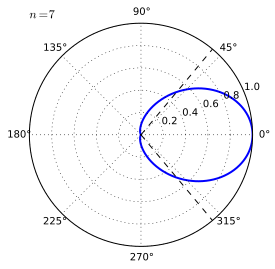

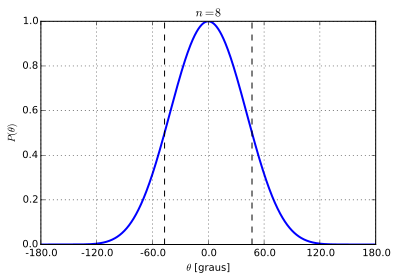

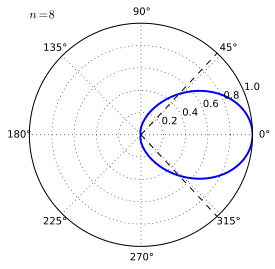

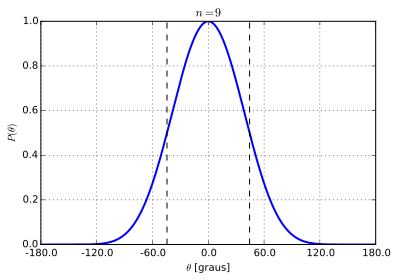

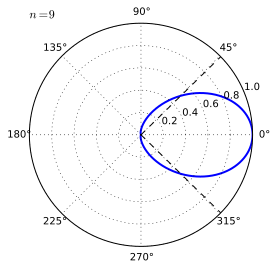

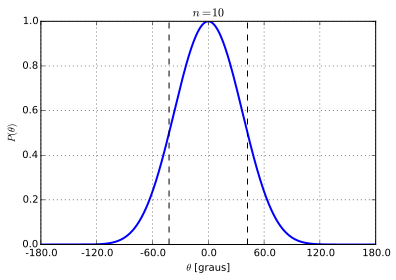

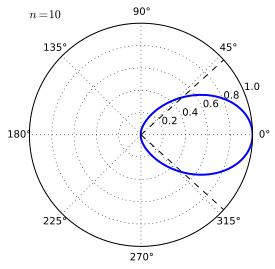

In [7]:
for n in np.arange(1,11):
    plotDiagramaRadiacao(n)

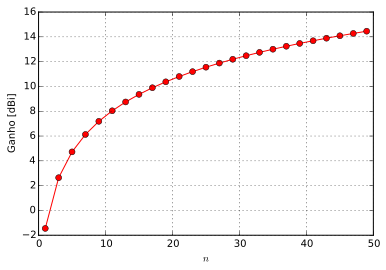

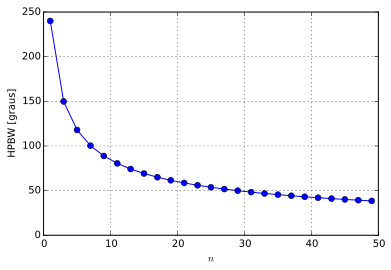

In [4]:
ganho_kraus = []
ganho_tp = []
meiapot = []

nrange = np.arange(1,51,2)

for n in nrange:
    ganho_kraus.append(g_kraus(n))
    ganho_tp.append(g_tp(n))
    meiapot.append(hpbw(n))
    
plt.figure()
plt.plot(nrange, ganho_kraus, '-ro')
#plt.plot(nrange, ganho_tp, '-go')
plt.xlabel('$n$')
plt.ylabel('Ganho [dBi]')
plt.grid()
plt.savefig('./figuras/n_vs_ganho.eps'.format(n), format='eps', dpi=1000)  


plt.figure()
plt.plot(nrange, meiapot, '-bo')
plt.xlabel('$n$')
plt.ylabel('HPBW [graus]')
plt.grid()
plt.savefig('./figuras/n_vs_hpbw.eps'.format(n), format='eps', dpi=1000)  